# Setup

## imports

In [1]:
import pandas as pd
import os
from pandasql import sqldf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

pysqldf = lambda q: sqldf(q, globals())



In [4]:
df = pd.read_pickle('/Users/logan.larson/code/nfl-big-data-bowl-2022/tracking_master_df.pkl')
df.head(3) 
# 3 minutes

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection,season,week,gameDate,gameTimeEastern,homeTeam,awayTeam,playerHeight,playerWeight,playerAgeDays,snapDetail,snapTime,operationTime,hangTime,kickType,kickContactType,kickLength,kickReturnYardage,kickDirectionIntended,kickDirectionActual,returnDirectionIntended,returnDirectionActual,missedTackler,assistTackler,tackler,kickoffReturnFormation,gunners,puntRushers,specialTeamsSafeties,vises,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,returnerId,kickBlockerId,yardlineSide,yardlineNumber,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,playResult,absoluteYardlineNumber
0,2021-01-03T18:03:02.200,61.21,46.77,0.08,0.13,0.01,186.21,144.73,None,42901.0,Dean Marlowe,31.0,SS,home,1,2021010300,40,left,2020,17,01/03/2021,13:00:00,BUF,MIA,6-1,208.0,10704.700125,None,NaN,NaN,3.73,D,None,75.0,NaN,C,C,None,None,None,None,None,8-0-2,None,None,MIA 29; MIA 33,None,1,0,0,MIA,Kickoff,Touchback,46298.0,None,NaN,MIA,35,15:00:00,None,None,NaN,0,0,None,40,75
1,2021-01-03T18:03:02.300,61.22,46.77,0.11,0.19,0.01,184.87,126.09,None,42901.0,Dean Marlowe,31.0,SS,home,2,2021010300,40,left,2020,17,01/03/2021,13:00:00,BUF,MIA,6-1,208.0,10704.700125,None,NaN,NaN,3.73,D,None,75.0,NaN,C,C,None,None,None,None,None,8-0-2,None,None,MIA 29; MIA 33,None,1,0,0,MIA,Kickoff,Touchback,46298.0,None,NaN,MIA,35,15:00:00,None,None,NaN,0,0,None,40,75
2,2021-01-03T18:03:02.400,61.23,46.76,0.10,0.18,0.01,183.38,108.95,None,42901.0,Dean Marlowe,31.0,SS,home,3,2021010300,40,left,2020,17,01/03/2021,13:00:00,BUF,MIA,6-1,208.0,10704.700125,None,NaN,NaN,3.73,D,None,75.0,NaN,C,C,None,None,None,None,None,8-0-2,None,None,MIA 29; MIA 33,None,1,0,0,MIA,Kickoff,Touchback,46298.0,None,NaN,MIA,35,15:00:00,None,None,NaN,0,0,None,40,75


In [3]:
newdf = df.query('specialTeamsPlayType == "Kickoff" & specialTeamsResult == "Return"')

In [32]:
newdf.head(4)

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection,season,week,gameDate,gameTimeEastern,homeTeam,awayTeam,playerHeight,playerWeight,playerAgeDays,snapDetail,snapTime,operationTime,hangTime,kickType,kickContactType,kickLength,kickReturnYardage,kickDirectionIntended,kickDirectionActual,returnDirectionIntended,returnDirectionActual,missedTackler,assistTackler,tackler,kickoffReturnFormation,gunners,puntRushers,specialTeamsSafeties,vises,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,returnerId,kickBlockerId,yardlineSide,yardlineNumber,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,playResult,absoluteYardlineNumber
2714,2021-01-03T18:21:35.000,61.15,46.11,0.04,0.09,0.00,178.38,157.00,None,42901.0,Dean Marlowe,31.0,SS,home,1,2021010300,395,left,2020,17,01/03/2021,13:00:00,BUF,MIA,6-1,208.0,10704.700125,None,NaN,NaN,4.08,D,None,68.0,27.0,C,C,R,R,MIA 42,None,MIA 36,8-0-2,None,None,MIA 29; MIA 33,None,1,0,0,MIA,Kickoff,Return,46298.0,44985,NaN,MIA,35,08:07:00,None,None,NaN,0,3,None,41,75
2715,2021-01-03T18:21:35.100,61.14,46.10,0.06,0.14,0.01,178.38,223.10,None,42901.0,Dean Marlowe,31.0,SS,home,2,2021010300,395,left,2020,17,01/03/2021,13:00:00,BUF,MIA,6-1,208.0,10704.700125,None,NaN,NaN,4.08,D,None,68.0,27.0,C,C,R,R,MIA 42,None,MIA 36,8-0-2,None,None,MIA 29; MIA 33,None,1,0,0,MIA,Kickoff,Return,46298.0,44985,NaN,MIA,35,08:07:00,None,None,NaN,0,3,None,41,75
2716,2021-01-03T18:21:35.200,61.15,46.10,0.04,0.04,0.01,176.96,152.33,None,42901.0,Dean Marlowe,31.0,SS,home,3,2021010300,395,left,2020,17,01/03/2021,13:00:00,BUF,MIA,6-1,208.0,10704.700125,None,NaN,NaN,4.08,D,None,68.0,27.0,C,C,R,R,MIA 42,None,MIA 36,8-0-2,None,None,MIA 29; MIA 33,None,1,0,0,MIA,Kickoff,Return,46298.0,44985,NaN,MIA,35,08:07:00,None,None,NaN,0,3,None,41,75
2717,2021-01-03T18:21:35.300,61.15,46.10,0.05,0.05,0.01,175.20,150.08,None,42901.0,Dean Marlowe,31.0,SS,home,4,2021010300,395,left,2020,17,01/03/2021,13:00:00,BUF,MIA,6-1,208.0,10704.700125,None,NaN,NaN,4.08,D,None,68.0,27.0,C,C,R,R,MIA 42,None,MIA 36,8-0-2,None,None,MIA 29; MIA 33,None,1,0,0,MIA,Kickoff,Return,46298.0,44985,NaN,MIA,35,08:07:00,None,None,NaN,0,3,None,41,75


# simulating individual plays

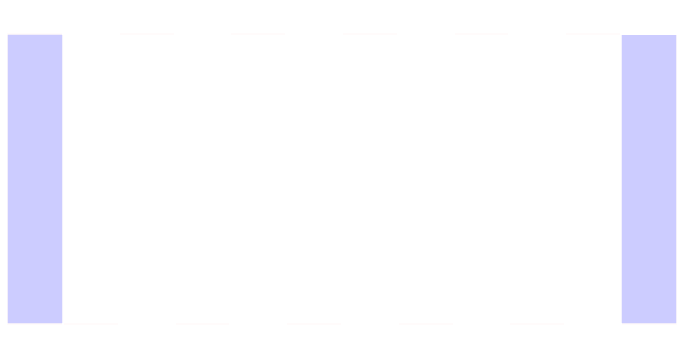

In [35]:
def create_football_field(linenumbers=True,
                          endzones=True,
                          highlight_line=False,
                          highlight_line_number=50,
                          highlighted_name='Line of Scrimmage',
                          fifty_is_los=False,
                          figsize=(12, 6.33)):
    """
    Function that plots the football field for viewing plays.
    Allows for showing or hiding endzones.
    """
    rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=0.1,
                             edgecolor='r', facecolor='white', zorder=0)

    fig, ax = plt.subplots(1, figsize=figsize)
    ax.add_patch(rect)

    plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
             [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
              53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
             color='white')
    if fifty_is_los:
        plt.plot([60, 60], [0, 53.3], color='gold')
        plt.text(62, 50, '<- Player Yardline at Snap', color='gold')
    # Endzones
    if endzones:
        ez1 = patches.Rectangle((0, 0), 10, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ez2 = patches.Rectangle((110, 0), 120, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ax.add_patch(ez1)
        ax.add_patch(ez2)
    plt.xlim(0, 120)
    plt.ylim(-5, 58.3)
    plt.axis('off')
    if linenumbers:
        for x in range(20, 110, 10):
            numb = x
            if x > 50:
                numb = 120 - x
            plt.text(x, 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white')
            plt.text(x - 0.95, 53.3 - 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white', rotation=180)
    if endzones:
        hash_range = range(11, 110)
    else:
        hash_range = range(1, 120)

    for x in hash_range:
        ax.plot([x, x], [0.4, 0.7], color='white')
        ax.plot([x, x], [53.0, 52.5], color='white')
        ax.plot([x, x], [22.91, 23.57], color='white')
        ax.plot([x, x], [29.73, 30.39], color='white')

    if highlight_line:
        hl = highlight_line_number + 10
        plt.plot([hl, hl], [0, 53.3], color='yellow')
        plt.text(hl + 2, 50, '<- {}'.format(highlighted_name),
                 color='yellow')
    return fig, ax

create_football_field()
plt.show()

No handles with labels found to put in legend.


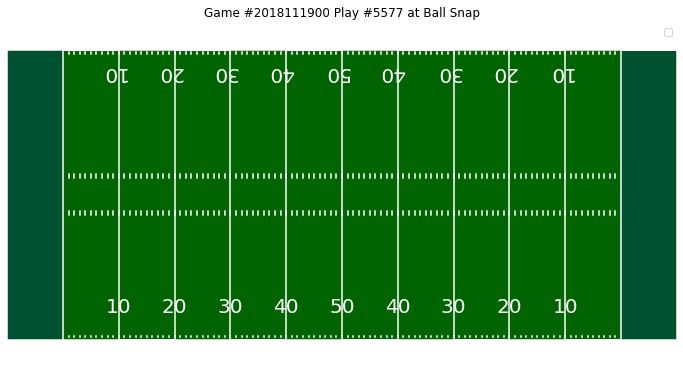

In [27]:
example_play_home = newdf.query('gameId == 2021010300 and playId == 395 and team == "home"')
example_play_away = newdf.query('gameId == 2021010300 and playId == 395 and team == "away"')

fig, ax = create_football_field()
example_play_home.query('event == "ball_snap"').plot(x='x', y='y', kind='scatter', ax=ax, color='orange', s=30, legend='Away')
example_play_away.query('event == "ball_snap"').plot(x='x', y='y', kind='scatter', ax=ax, color='blue', s=30, legend='Home')
plt.title('Game #2018111900 Play #5577 at Ball Snap')
plt.legend()
plt.show()


In [26]:
newdf.query('gameId == 2021010300 and playId == 395 and team == "home"')


,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection,season,week,gameDate,gameTimeEastern,homeTeam,awayTeam,playerHeight,playerWeight,playerAgeDays,snapDetail,snapTime,operationTime,hangTime,kickType,kickContactType,kickLength,kickReturnYardage,kickDirectionIntended,kickDirectionActual,returnDirectionIntended,returnDirectionActual,missedTackler,assistTackler,tackler,kickoffReturnFormation,gunners,puntRushers,specialTeamsSafeties,vises,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,returnerId,kickBlockerId,yardlineSide,yardlineNumber,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,playResult,absoluteYardlineNumber
2714,2021-01-03T18:21:35.000,61.15,46.11,0.04,0.09,0.00,178.38,157.00,None,42901.0,Dean Marlowe,31.0,SS,home,1,2021010300,395,left,2020,17,01/03/2021,13:00:00,BUF,MIA,6-1,208.0,10704.700125,None,NaN,NaN,4.08,D,None,68.0,27.0,C,C,R,R,MIA 42,None,MIA 36,8-0-2,None,None,MIA 29; MIA 33,None,1,0,0,MIA,Kickoff,Return,46298.0,44985,NaN,MIA,35,08:07:00,None,None,NaN,0,3,None,41,75
2715,2021-01-03T18:21:35.100,61.14,46.10,0.06,0.14,0.01,178.38,223.10,None,42901.0,Dean Marlowe,31.0,SS,home,2,2021010300,395,left,2020,17,01/03/2021,13:00:00,BUF,MIA,6-1,208.0,10704.700125,None,NaN,NaN,4.08,D,None,68.0,27.0,C,C,R,R,MIA 42,None,MIA 36,8-0-2,None,None,MIA 29; MIA 33,None,1,0,0,MIA,Kickoff,Return,46298.0,44985,NaN,MIA,35,08:07:00,None,None,NaN,0,3,None,41,75
2716,2021-01-03T18:21:35.200,61.15,46.10,0.04,0.04,0.01,176.96,152.33,None,42901.0,Dean Marlowe,31.0,SS,home,3,2021010300,395,left,2020,17,01/03/2021,13:00:00,BUF,MIA,6-1,208.0,10704.700125,None,NaN,NaN,4.08,D,None,68.0,27.0,C,C,R,R,MIA 42,None,MIA 36,8-0-2,None,None,MIA 29; MIA 33,None,1,0,0,MIA,Kickoff,Return,46298.0,44985,NaN,MIA,35,08:07:00,None,None,NaN,0,3,None,41,75
2717,2021-01-03T18:21:35.300,61.15,46.10,0.05,0.05,0.01,175.20,150.08,None,42901.0,Dean Marlowe,31.0,SS,home,4,2021010300,395,left,2020,17,01/03/2021,13:00:00,BUF,MIA,6-1,208.0,10704.700125,None,NaN,NaN,4.08,D,None,68.0,27.0,C,C,R,R,MIA 42,None,MIA 36,8-0-2,None,None,MIA 29; MIA 33,None,1,0,0,MIA,Kickoff,Return,46298.0,44985,NaN,MIA,35,08:07:00,None,None,NaN,0,3,None,41,75
2718,2021-01-03T18:21:35.400,61.15,46.09,0.06,0.11,0.01,173.08,187.54,None,42901.0,Dean Marlowe,31.0,SS,home,5,2021010300,395,left,2020,17,01/03/2021,13:00:00,BUF,MIA,6-1,208.0,10704.700125,None,NaN,NaN,4.08,D,None,68.0,27.0,C,C,R,R,MIA 42,None,MIA 36,8-0-2,None,None,MIA 29; MIA 33,None,1,0,0,MIA,Kickoff,Return,46298.0,44985,NaN,MIA,35,08:07:00,None,None,NaN,0,3,None,41,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5063,2021-01-03T18:21:45.200,27.41,5.56,3.71,2.29,0.37,98.65,129.83,None,52536.0,Gabriel Davis,13.0,WR,home,103,2021010300,395,left,2020,17,01/03/2021,13:00:00,BUF,MIA,6-3,213.0,8294.700125,None,NaN,NaN,4.08,D,None,68.0,27.0,C,C,R,R,MIA 42,None,MIA 36,8-0-2,None,None,MIA 29; MIA 33,None,1,0,0,MIA,Kickoff,Return,46298.0,44985,NaN,MIA,35,08:07:00,None,None,NaN,0,3,None,41,75
5064,2021-01-03T18:21:45.300,27.70,5.33,3.70,1.95,0.37,96.01,126.55,None,52536.0,Gabriel Davis,13.0,WR,home,104,2021010300,395,left,2020,17,01/03/2021,13:00:00,BUF,MIA,6-3,213.0,8294.700125,None,NaN,NaN,4.08,D,None,68.0,27.0,C,C,R,R,MIA 42,None,MIA 36,8-0-2,None,None,MIA 29; MIA 33,None,1,0,0,MIA,Kickoff,Return,46298.0,44985,NaN,MIA,35,08:07:00,None,None,NaN,0,3,None,41,75
5065,2021-01-03T18:21:45.400,28.00,5.13,3.62,1.64,0.36,92.59,124.01,None,52536.0,Gabriel Davis,13.0,WR,home,105,2021010300,395,left,2020,17,01/03/2021,13:00:00,BUF,MIA,6-3,213.0,8294.700125,None,NaN,NaN,4.08,D,None,68.0,27.0,C,C,R,R,MIA 42,None,MIA 36,8-0-2,None,None,MIA 29; MIA 33,None,1,0,0,MIA,Kickoff,Return,46298.0

In [18]:
def plot_presnap_alignment(df, gameId, playId):
    example_play_home = tracking2020.query(f'gameId == {gameID} and playId == {playId} and team == "home"')
    example_play_away = tracking2020.query(f'gameId == {gameID} and playId == {playId} and team == "away"')

    fig, ax = create_football_field()
    example_play_home.query('event == "ball_snap"').plot(x='x', y='y', kind='scatter', ax=ax, color='orange', s=30, legend='Away')
    example_play_away.query('event == "ball_snap"').plot(x='x', y='y', kind='scatter', ax=ax, color='blue', s=30, legend='Home')
    plt.title(f'Game {gameID} Play {playId} at Ball Snap')
    plt.legend()
    plt.show()


No handles with labels found to put in legend.


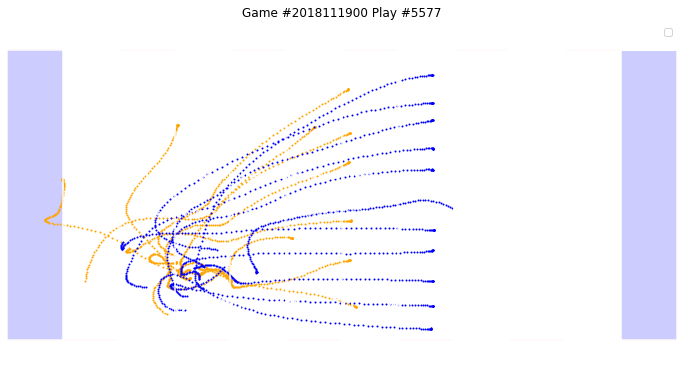

In [40]:
example_play_home = df.query('gameId == 2021010300 and playId == 395 and team == "home"')
example_play_away = df.query('gameId == 2021010300 and playId == 395 and team == "away"')

fig, ax = create_football_field()
example_play_home.plot(x='x', y='y', kind='scatter', ax=ax, color='orange', s=1, legend='Away')
example_play_away.plot(x='x', y='y', kind='scatter', ax=ax, color='blue', s=1, legend='Home')
plt.title('Game #2018111900 Play #5577')
plt.legend()
plt.show()


No handles with labels found to put in legend.


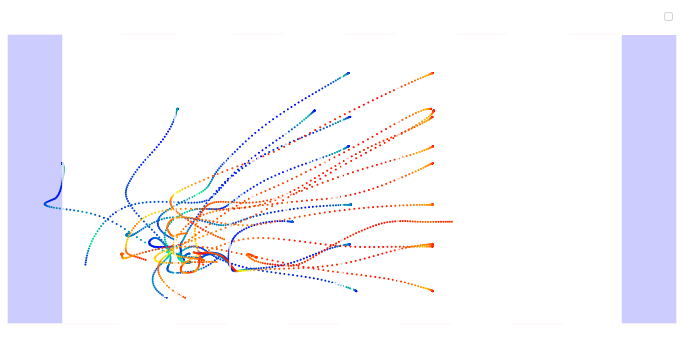

In [60]:
fig, ax = create_football_field()
# example_play_home.plot(x='x', y='y', kind='scatter', ax=ax, color='orange', s=1, legend='Away')
# example_play_away.plot(x='x', y='y', kind='scatter', ax=ax, color='blue', s=1, legend='Home')
plt.scatter(example_play_home.x, example_play_home.y, c=example_play_away.a,cmap='winter', s=1)
plt.scatter(example_play_away.x, example_play_home.y, c=example_play_away.a,cmap='autumn', s=1)
plt.legend()
plt.show()


# generate photo dataset

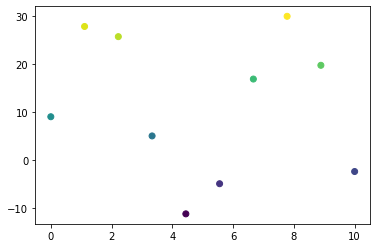

In [41]:
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0,10,10)
temperature = 21*np.sin(t)+9
colors = temperature 
plt.scatter(t,temperature,c=colors)
plt.show()